In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib

In [2]:
df1 = pd.read_csv('df1',index_col=0)
df2 = pd.read_csv('df2')

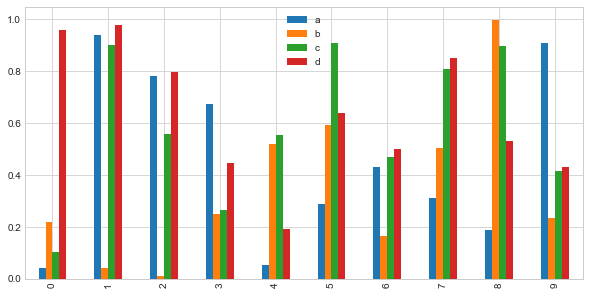

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
df2.plot(kind='bar', ax=ax)

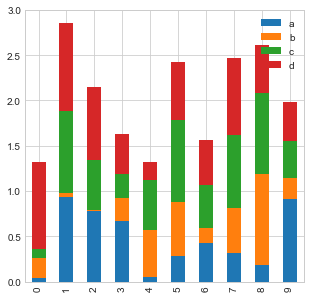

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
df2.plot(kind='bar', stacked=True, ax=ax)

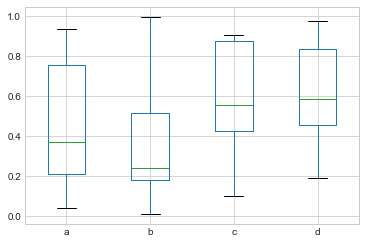

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
df2.plot(kind='box', ax=ax)

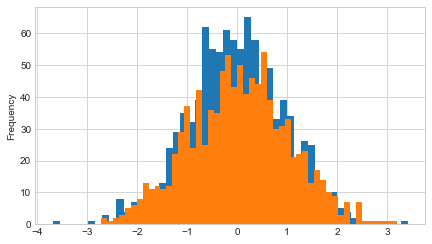

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))
# top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
df1['A'].plot(kind='hist', bins=50, ax=ax)
df1['B'].plot(kind='hist', bins=50, ax=ax)

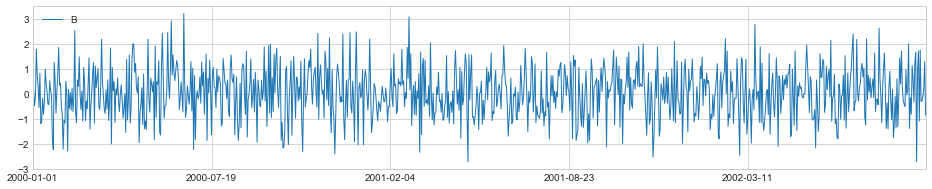

In [7]:
fig, ax = plt.subplots(figsize=(16,3))
df1.plot(kind='line', x=df1.index,y='B',lw=1, ax=ax)

In [8]:
nba = pd.read_csv('pandas/udemy_material/nba.csv')
nba.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN


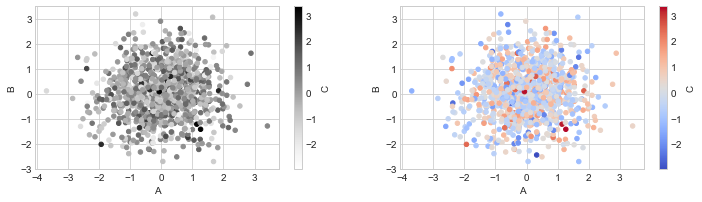

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(12,3))
df1.plot(kind='scatter', x='A', y='B', c='C', ax=ax0)
df1.plot.scatter(x='A', y='B', c='C', cmap='coolwarm',ax=ax1)

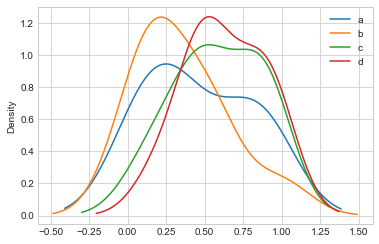

In [10]:
fig, ax = plt.subplots()
df2.plot(kind='density', ax=ax)

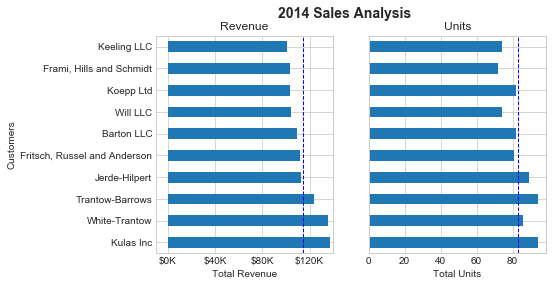

In [11]:
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)


ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
ax0.set_xticks(range(0,160000,40000))

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

# Since we have the fig object, we can save the figure using multiple options:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [8]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


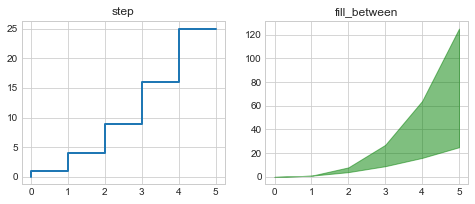

In [13]:
x = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(8,3))

ax0.step( x, x**2, lw=2)
ax0.set_title("step")

ax1.fill_between(x, x**2, x**3, color="green", alpha=0.5);
ax1.set_title("fill_between")

# Seaborn

"Axes-level" functions, including regplot, boxplot, kdeplot, and many others

"Figure-level" functions, including lmplot, factorplot, jointplot and one or two others

The first group is identified by taking an explicit ax argument and returning an Axes object. 

As this suggests, you can use them in an "object oriented" style by passing your Axes to them:

Axes-level functions will only draw onto an Axes and won't otherwise mess with the figure, so they can coexist perfectly happily in an object-oriented matplotlib script.

The second group of functions (Figure-level) are distinguished by the fact that the resulting plot can potentially include several Axes which are always organized in a "meaningful" way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an lmplot onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing.

However, once you've called lmplot, it will return an object of the type FacetGrid. This object has some methods for operating on the resulting plot that know a bit about the structure of the plot. It also exposes the underlying figure and array of axes at the FacetGrid.fig and FacetGrid.axes arguments. The jointplot function is very similar, but it uses a JointGrid object. So you can still use these functions in an object-oriented context, but all of your customization has to come after you've called the function.

In [14]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


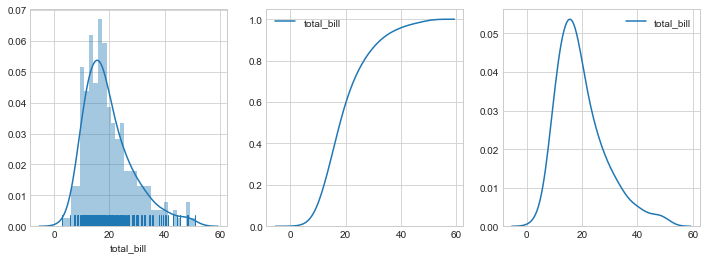

In [15]:
# rugplots make simple plots with ticks for data points
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

sns.rugplot(tips['total_bill'], ax=ax0)
sns.distplot(tips['total_bill'], bins =30, ax=ax0)

# Cumulative
sns.kdeplot(tips['total_bill'], cumulative=True, ax=ax1)

sns.kdeplot(tips['total_bill'], ax=ax2)

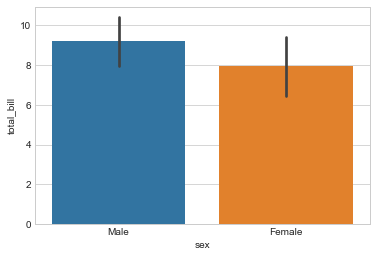

In [16]:
# bar plot
# x is categorical column, y is numerical column
# estimator is an aggregate function, we use numpy std
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB
None


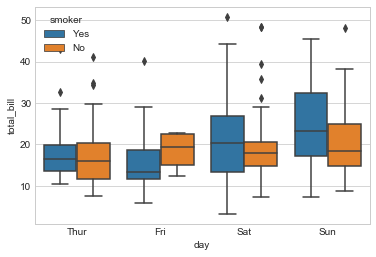

In [10]:
# hue adds a whole new layer of data, in this case smoker
print(tips.info())
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

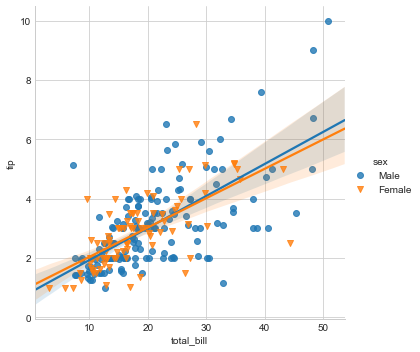

In [18]:
# LM allows to display linear models with seaborn markers from matplotlib
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', 
           markers=['o', 'v'])

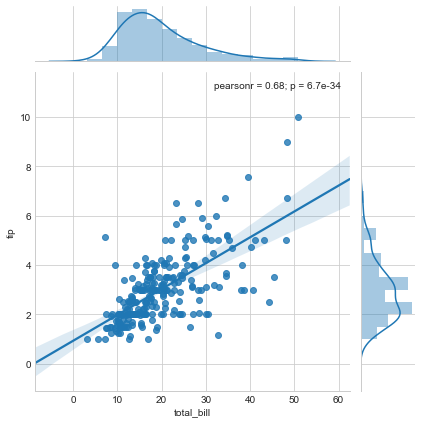

In [19]:
# jointplot links two distplots for bivariate data
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

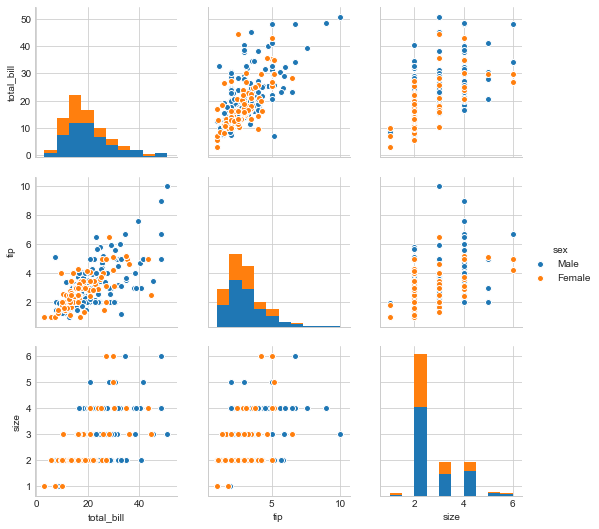

In [20]:
# plots pairs of columns for all columns selected
# supports a hue argument for categorical data
# Great for quickly viewing all comparisons
sns.pairplot(tips, hue='sex')

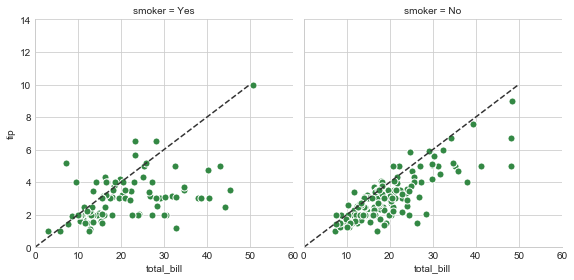

In [21]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

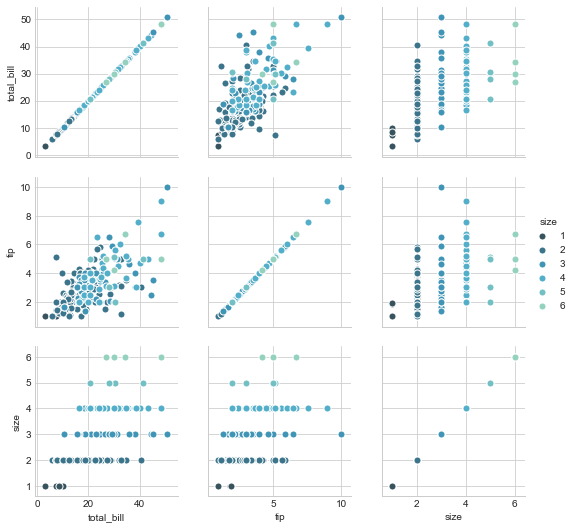

In [22]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

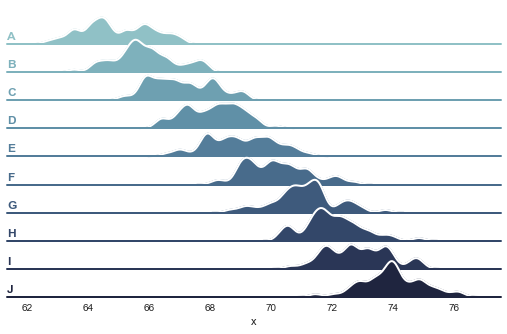

In [23]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [24]:
flights = sns.load_dataset('flights')

# df requires columns of x and y for axes and value for plot color
# Needs to be made into pivot table
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
pvflights.head(2)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391


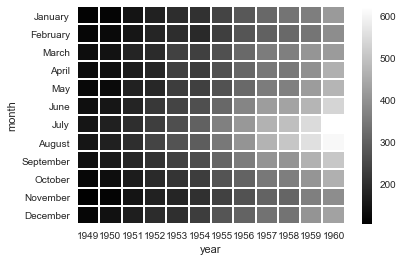

In [25]:
sns.heatmap(pvflights, cmap='gray', linecolor='white', linewidth=1)